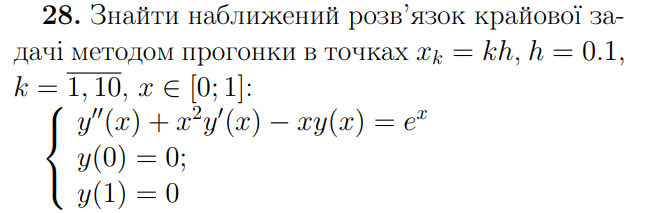

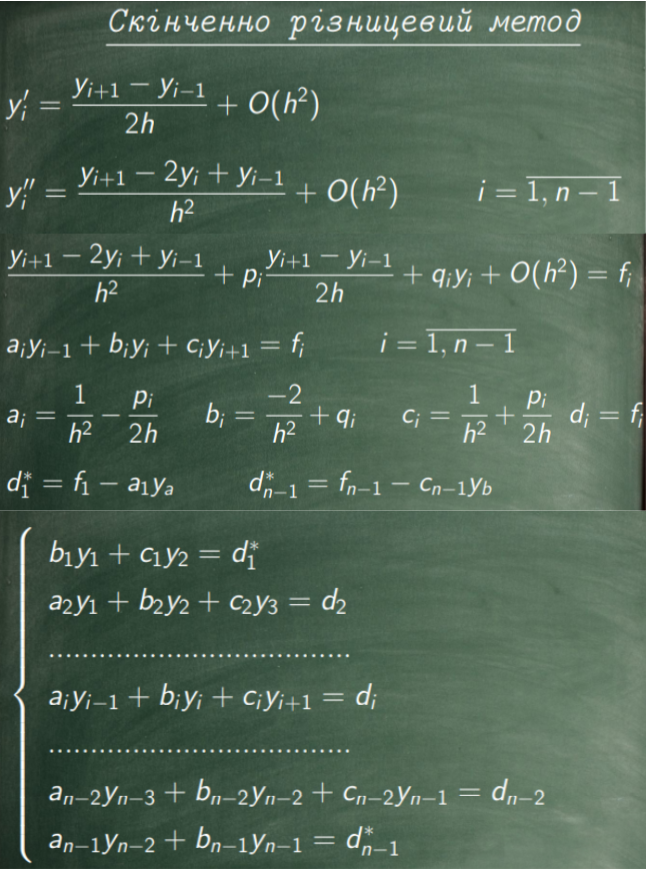

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [21]:
h = 0.1
a = lambda x: 1/h**2 - x**2/2/h
b = lambda x: -2/h**2 - x
c = lambda x: 1/h**2 + x**2/2/h
d = lambda x: np.e**x

def prohonka(x, ya, yb, n):
    alfa = [0,0,-c(x[1])/b(x[1])]
    beta = [0,0,(d(x[1])-a(x[1])*ya)/b(x[1])]
    gamma = [0,0]
    for i in range(2,n-1):
        gamma.append(-b(x[i])-a(x[i])*alfa[i])
        alfa.append(c(x[i])/gamma[i])
        beta.append((-d(x[i])+a(x[i])*beta[i])/gamma[i])
    y = [0]*(n+1)
    y[0] = ya
    y[n] = yb
    y[n-1] = (-d(x[n-1])+c(x[n-1])*yb+a(x[n-1])*beta[n-1])/(-b(x[n-1])-a(x[n-1])*alfa[n-1])
    for i in range(n-2,0,-1):
        y[i] = y[i+1]*alfa[i+1] + beta[i+1]   
    return y

n = 10
x = np.arange(0, 1+h, h)
y = prohonka(x, 0, 0, n)
Matrix([x, y]).T.n(4)

Matrix([
[  0,        0],
[0.1, -0.06294],
[0.2,  -0.1148],
[0.3,  -0.1546],
[0.4,   -0.181],
[0.5,  -0.1929],
[0.6,  -0.1891],
[0.7,  -0.1688],
[0.8,  -0.1308],
[0.9, -0.07473],
[1.0,        0]])

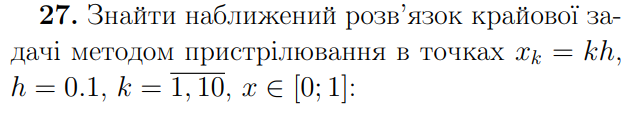

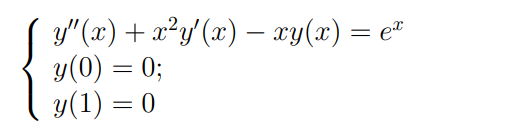

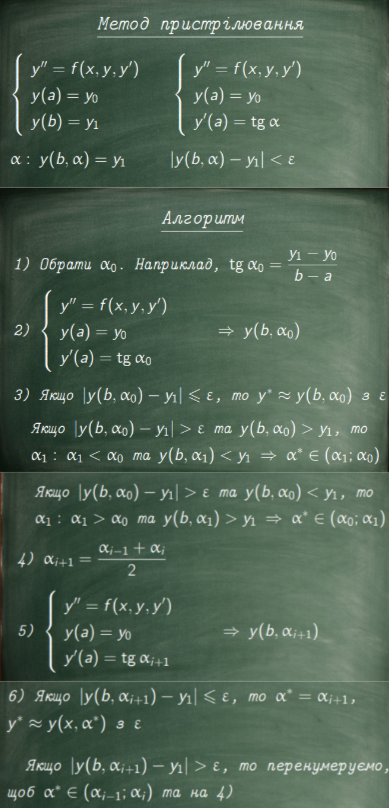

In [20]:
f = lambda x, y, u: np.e**x - x**2*u + x*y
epsilon = 1e-5
h = 0.1
n = 10
y0 = 0
yn = 0
x0 = 0

def shooting_method():
    left, right = -100, 100
    shot = shoot(0)
    
    while abs(shot-yn) > epsilon:
        if shot > yn:
            right = (right + left) / 2
        elif shot < yn:
            left = (right + left) / 2
        shot = shoot((right + left) / 2)

def shoot(u0):
    global ys, us
    
    ys = [y0]
    us = [u0]
    x = x0
    
    for i in range(n):
        y = ys[-1]
        u = us[-1]
        y_next = y + h*u
        u_next = u + h*f(x,y,u)
        x += h
        ys.append(y_next)
        us.append(u_next)   
    return ys[-1]


shooting_method()

x = np.arange(0, 1+h, h)
Matrix([x, ys]).T.n(4)

Matrix([
[  0,        0],
[0.1, -0.05794],
[0.2,  -0.1059],
[0.3,  -0.1428],
[0.4,  -0.1675],
[0.5,   -0.179],
[0.6,   -0.176],
[0.7,  -0.1575],
[0.8,  -0.1225],
[0.9, -0.07023],
[1.0, 6.552e-6]])